# Brain Tumor Detection

#### <b> Load the  Dataset

In [1]:
data = '/kaggle/input/brain-mri-images-for-brain-tumor-detection'

In [2]:
import os
print(os.listdir(data))

['no', 'yes', 'brain_tumor_dataset']


#### <b> Visualize the  Data

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


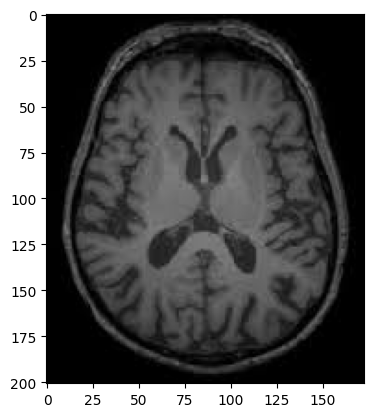

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as img
img=img.imread('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/10 no.jpg')
imgplot = plt.imshow(img)
plt.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


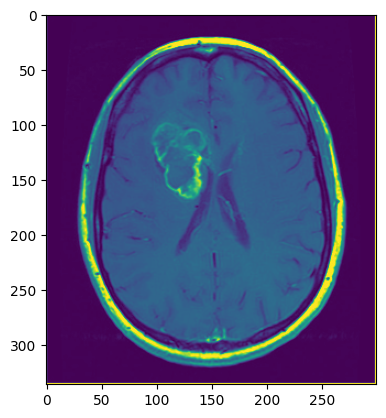

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as img
img=img.imread('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y101.jpg')
imgplot = plt.imshow(img)
plt.show()

##  Import Libraries

In [5]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings 
warnings.filterwarnings('ignore')

2024-08-11 19:05:41.314165: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 19:05:41.314264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 19:05:41.441559: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Designing the Model

In [6]:
import os
import cv2

def resize_and_convert_color(input_dir, output_dir, target_size=(224, 224)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check if the file is an image
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path)

            if image is not None:
                # Resize image
                resized_image = cv2.resize(image, target_size)

                # Convert color from BGR to RGB
                rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

                # Save the converted image
                output_path = os.path.join(output_dir, filename)
                cv2.imwrite(output_path, rgb_image)

                print(f"Processed: {filename}")

In [7]:
# Example usage:
input_directory = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/no"
output_directory = "/kaggle/working/no"
resize_and_convert_color(input_directory, output_directory)

Processed: 34 no.jpg
Processed: 49 no.jpg
Processed: N15.jpg
Processed: No18.jpg
Processed: 31 no.jpg
Processed: no 6.jpg
Processed: 3 no.jpg
Processed: no 5.jpeg
Processed: no 1.jpg
Processed: 26 no.jpg
Processed: N5.jpg
Processed: 6 no.jpg
Processed: No21.jpg
Processed: 17 no.jpg
Processed: No22.jpg
Processed: 29 no.jpg
Processed: 46 no.jpg
Processed: 32 no.jpg
Processed: 42 no.jpg
Processed: no 90.jpg
Processed: no 94.jpg
Processed: No19.jpg
Processed: 47 no.jpg
Processed: No12.jpg
Processed: 15 no.jpg
Processed: 20 no.jpg
Processed: No13.jpg
Processed: 11 no.jpg
Processed: N11.jpg
Processed: No17.jpg
Processed: no 98.jpg
Processed: 18 no.jpg
Processed: 25 no.jpg
Processed: 24 no.jpg
Processed: no 91.jpeg
Processed: 45 no.jpg
Processed: 22 no.jpg
Processed: No16.jpg
Processed: 44no.jpg
Processed: 4 no.jpg
Processed: 36 no.jpg
Processed: 8 no.jpg
Processed: 48 no.jpeg
Processed: No20.jpg
Processed: no 2.jpg
Processed: no 10.jpg
Processed: 7 no.jpg
Processed: 10 no.jpg
Processed: N17.

In [8]:
# Example usage:
input_directory = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes"
output_directory = "/kaggle/working//yes"
resize_and_convert_color(input_directory, output_directory)

Processed: Y162.jpg
Processed: Y9.jpg
Processed: Y108.jpg
Processed: Y106.jpg
Processed: Y103.jpg
Processed: Y185.jpg
Processed: Y180.jpg
Processed: Y54.jpg
Processed: Y3.jpg
Processed: Y82.jpg
Processed: Y169.jpg
Processed: Y27.jpg
Processed: Y73.jpg
Processed: Y181.jpg
Processed: Y81.jpg
Processed: Y17.jpg
Processed: Y69.jpg
Processed: Y32.jpg
Processed: Y186.jpg
Processed: Y42.jpg
Processed: Y250.jpg
Processed: Y60.jpg
Processed: Y252.jpg
Processed: Y154.jpg
Processed: Y79.jpg
Processed: Y31.jpg
Processed: Y91.jpg
Processed: Y95.jpg
Processed: Y22.jpg
Processed: Y35.jpg
Processed: Y33.jpg
Processed: Y13.jpg
Processed: Y29.jpg
Processed: Y55.jpg
Processed: Y4.jpg
Processed: Y26.jpg
Processed: Y257.jpg
Processed: Y14.jpg
Processed: Y25.jpg
Processed: Y51.jpg
Processed: Y34.jpg
Processed: Y39.jpg
Processed: Y15.jpg
Processed: Y104.jpg
Processed: Y187.jpg
Processed: Y38.jpg
Processed: Y37.jpg
Processed: Y24.jpg
Processed: Y6.jpg
Processed: Y28.jpg
Processed: Y30.jpg
Processed: Y90.jpg
P

In [9]:
# Create train and test folders
output_folder="/kaggle/working/"

train_folder = os.path.join(output_folder, 'train')
test_folder = os.path.join(output_folder, 'test')
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

In [10]:
classes=["yes","no"]

In [11]:
path="/kaggle/working/"

In [12]:
# # Iterate over the classes and split the data
from sklearn.model_selection import train_test_split
import shutil

for class_name in classes:
    class_folder = os.path.join(path, class_name)

    # List all the images in the class folder
    images = os.listdir(class_folder)

    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create class-specific folders in train and test
    train_class_folder = os.path.join(train_folder, class_name)
    test_class_folder = os.path.join(test_folder, class_name)
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

    # Move images to the respective folders
    for image in train_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(train_class_folder, image)
        shutil.copy(src_path, dest_path)

    for image in test_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(test_class_folder, image)
        shutil.copy(src_path, dest_path)

print("Dataset split and organized into train and test folders.")

Dataset split and organized into train and test folders.


In [13]:
IMAGE_SIZE=(224,224)
BATCH_SIZE=32

#### <b> Generate Images to train the model

In [14]:
train_images="/kaggle/working/train"
test_images="/kaggle/working/test"

In [15]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1. /255)


train_generator =train_datagen.flow_from_directory(train_images,
                                                   target_size =(224,224),
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   classes=['yes','no'])


validation_generator =test_datagen.flow_from_directory(test_images,
                                                       target_size =(224,224),
                                                       batch_size=20,
                                                       classes=['yes','no'],
                                                       class_mode='binary')


Found 142 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


#### **Visual Representation of ImageDataGenerator**

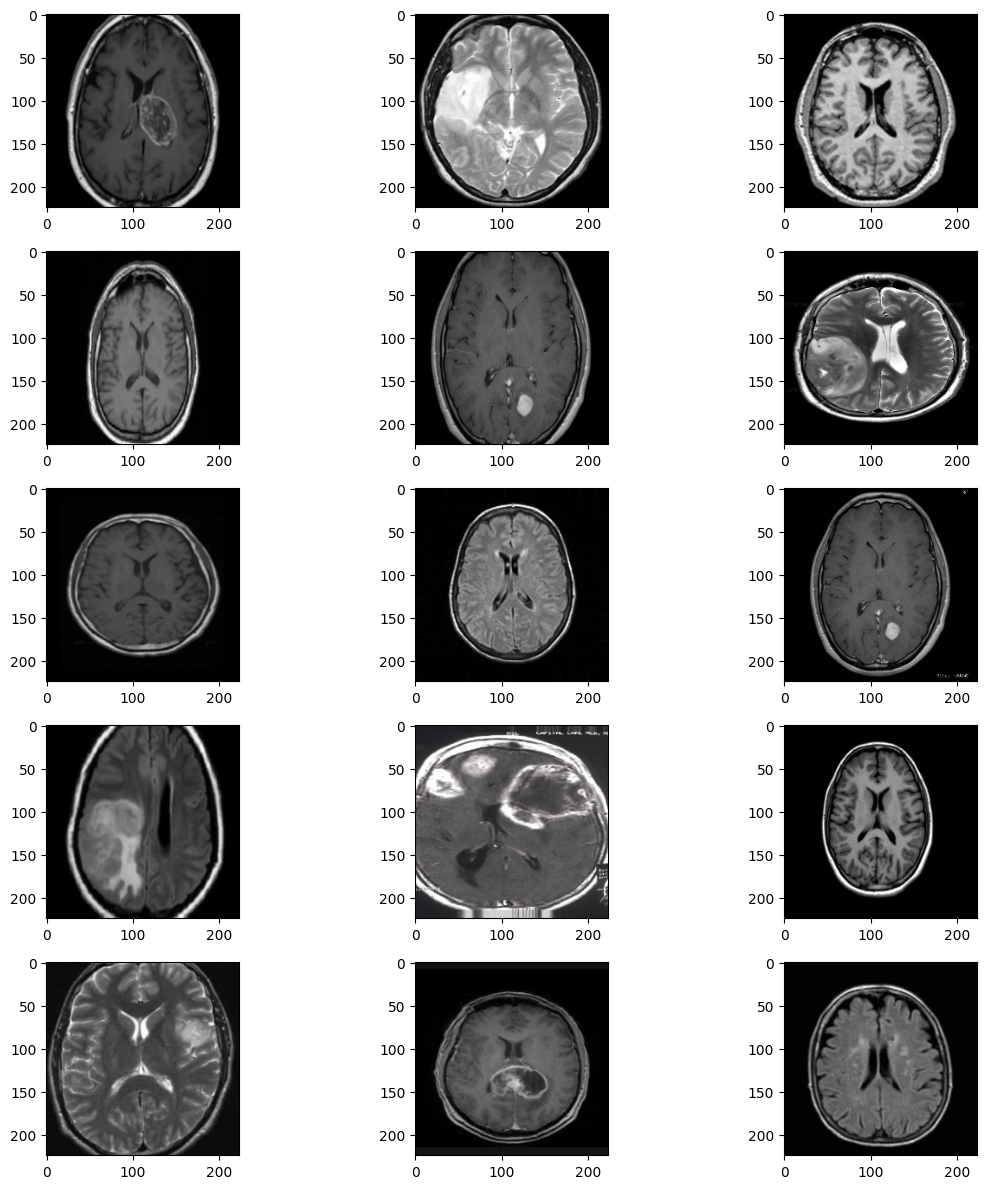

In [16]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### <b> Build the basic CNN model 0

In [17]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
training=model.fit(train_generator,
          validation_data=validation_generator,
          epochs=20,
          batch_size=32,
          validation_split=0.2)

Epoch 1/20


2024-08-11 19:06:06.592768: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.63812, expected 5.86815
2024-08-11 19:06:06.592824: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.57545, expected 5.80549
2024-08-11 19:06:06.592838: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.58905, expected 5.81908
2024-08-11 19:06:06.592853: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.3889, expected 5.61894
2024-08-11 19:06:06.592870: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 6.23839, expected 5.46843
2024-08-11 19:06:06.592881: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 4.97291, expected 4.20294
2024-08-11 19:06:06.592891: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 5.35322, expected 4.58326
2024-08-11 19:06:06.592902: E external/local_xla/xla/

1/8 ━━━━━━━━━━━━━━━━━━━━ 1:22 12s/step - accuracy: 0.4000 - loss: 0.7260

I0000 00:00:1723403172.763292     120 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-08-11 19:06:14.169556: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 3.4831, expected 2.95098
2024-08-11 19:06:14.169614: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 28: 4.12173, expected 3.58961
2024-08-11 19:06:14.169624: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 62: 4.27148, expected 3.73936
2024-08-11 19:06:14.169632: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 66: 3.80207, expected 3.26995
2024-08-11 19:06:14.169640: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 83: 3.95449, expected 3.42237
2024-08-11 19:06:14.169649: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 85: 4.14698, expected 3.61486
2024-08-11 19:06:14.169657: E

6/8 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step - accuracy: 0.4995 - loss: 1.0853

2024-08-11 19:06:18.168097: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.99007, expected 6.15692
2024-08-11 19:06:18.168154: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.39512, expected 5.56197
2024-08-11 19:06:18.168164: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.95928, expected 5.12613
2024-08-11 19:06:18.168171: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.97689, expected 5.14374
2024-08-11 19:06:18.168179: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.1288, expected 5.29565
2024-08-11 19:06:18.168187: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.45423, expected 5.62107
2024-08-11 19:06:18.168195: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.55749, expected 5.72433
2024-08-11 19:06:18.168202: E external/local_xla/xla/ser

8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 944ms/step - accuracy: 0.5266 - loss: 1.1148 - val_accuracy: 0.5135 - val_loss: 1.5123
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6177 - loss: 1.4678 - val_accuracy: 0.5135 - val_loss: 1.3331
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4944 - loss: 1.2262 - val_accuracy: 0.7027 - val_loss: 0.6076
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5757 - loss: 0.7678 - val_accuracy: 0.6757 - val_loss: 0.6311
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6676 - loss: 0.6329 - val_accuracy: 0.7027 - val_loss: 0.6094
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6171 - loss: 0.8302 - val_accuracy: 0.6757 - val_loss: 0.6333
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6623 - loss: 0.6131 - val_accuracy: 0.4595 - val_loss: 0.6556
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5116 - loss: 0.7234 - val_accuracy: 0.5135 - val_loss: 0.6902
Epoch 9/2

#### <b> Find the accuracy score


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


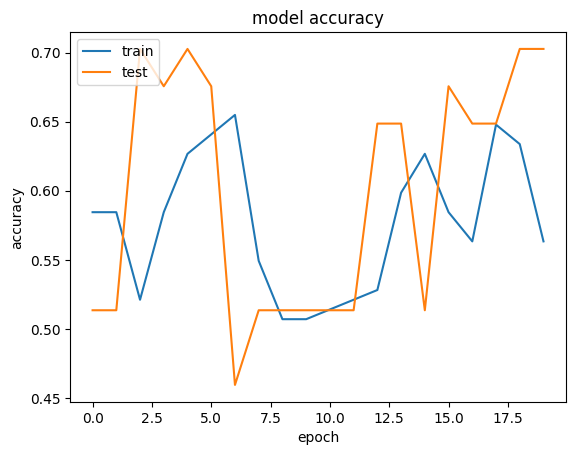

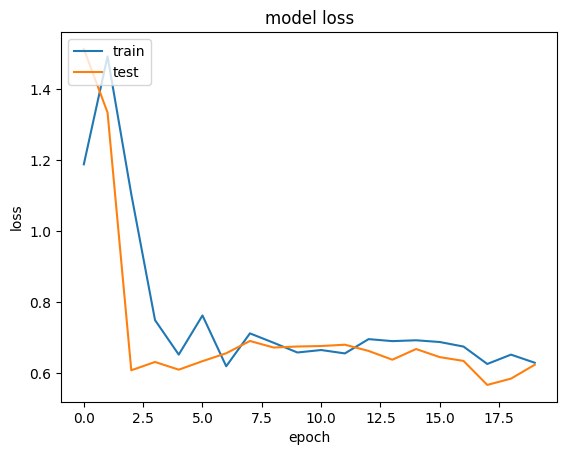

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


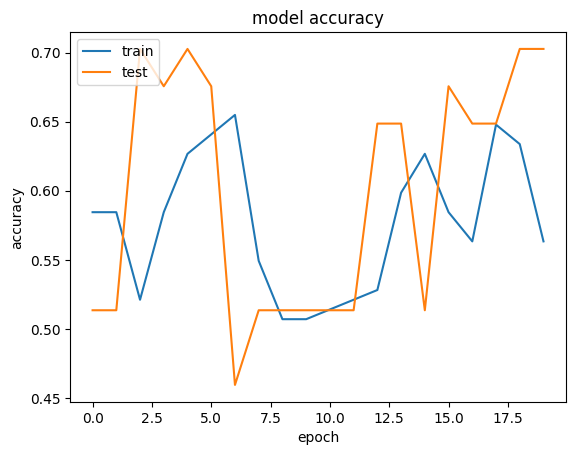

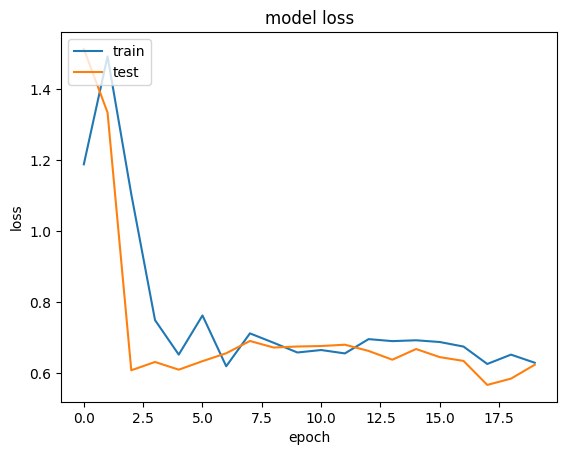

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


2024-08-11 19:06:52.676021: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147863: 4.14435, expected 3.59734
2024-08-11 19:06:52.676078: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148032: 3.73171, expected 3.1847
2024-08-11 19:06:52.676095: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148049: 4.2981, expected 3.75109
2024-08-11 19:06:52.676120: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149297: 4.2275, expected 3.68049
2024-08-11 19:06:52.676134: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149362: 3.89754, expected 3.35053
2024-08-11 19:06:52.676146: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149444: 4.35104, expected 3.80403
2024-08-11 19:06:52.676157: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149482: 4.25819, expected 3.71118
2024-08-11 19:06:52.676

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
[[0.82949793]]
Prediction:  yes


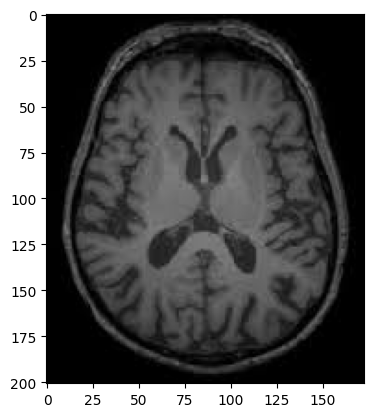

In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/10 no.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="no"
else:
    prediction ="yes"
print('Prediction: ',prediction)

img=mpimg.imread('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/10 no.jpg')
imgplot = plt.imshow(img)
plt.show()


#### <b>Predict the image</b>


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.]]
Prediction:  yes


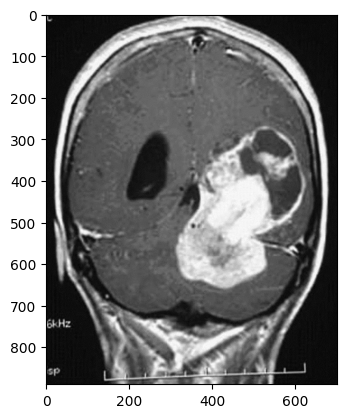

In [23]:
img_pred = image.load_img("/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y104.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="no"
else:
    prediction ="yes"
print('Prediction: ',prediction)

img=mpimg.imread('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y104.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 1

#### Let's add add some layers to prevent ovetfitting


In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))


#### <b> Compile the basic CNN model1

In [25]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

#### <b> Fit the basic CNN model1

In [26]:
training=model1.fit(train_generator,
          validation_data=validation_generator,
          epochs=20,
          batch_size=32,
          validation_split=0.2)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 643ms/step - accuracy: 0.3914 - loss: 1.9591 - val_accuracy: 0.6757 - val_loss: 0.5418
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5244 - loss: 1.2246 - val_accuracy: 0.5135 - val_loss: 0.9687
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6076 - loss: 0.8774 - val_accuracy: 0.5946 - val_loss: 0.6915
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6445 - loss: 0.7075 - val_accuracy: 0.5946 - val_loss: 0.6024
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6269 - loss: 0.7362 - val_accuracy: 0.7838 - val_loss: 0.5827
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6703 - loss: 0.5791 - val_accuracy: 0.7568 - val_loss: 0.5513
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5837 - loss: 0.6779 - val_accuracy: 0.7568 - val_loss: 0.5635
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6582 - loss: 0.5691 - val_accuracy: 0.7838 - val_loss: 0.516

#### <b> Find the accuracy score


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


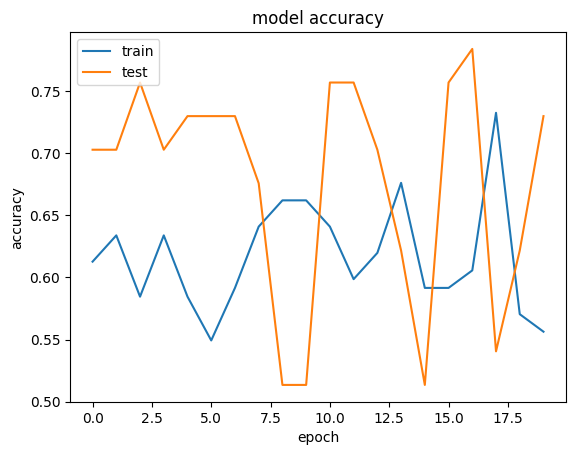

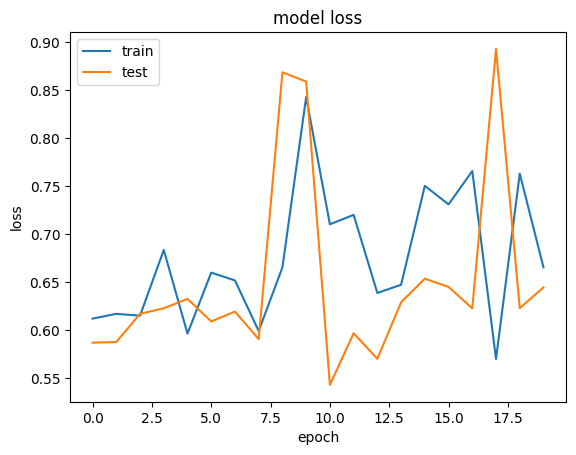

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### <b> Build the basic CNN model 2

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='softmax'))

#### <b> Compile the basic CNN model2

In [29]:
#model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,985 (42.61 MB)

 Trainable params: 11,169,537 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

#### <b> Fit the basic CNN model2

In [30]:
training=model1.fit(train_generator,
          validation_data=validation_generator,
          epochs=20,
          batch_size=32,
          validation_split=0.2,callbacks=callbacks)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6214 - loss: 0.5852 - val_accuracy: 0.7027 - val_loss: 0.5871 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6245 - loss: 0.6146 - val_accuracy: 0.7027 - val_loss: 0.5877 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5874 - loss: 0.6128 - val_accuracy: 0.7568 - val_loss: 0.6171 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5821 - loss: 0.6863 - val_accuracy: 0.7027 - val_loss: 0.6229 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5914 - loss: 0.6030 - val_accuracy: 0.7297 - val_loss: 0.6327 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4893 - loss: 0.6630 - val_accuracy: 0.7297 - val_loss: 0.6092 - learning_rate: 0.0010
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6347 - loss: 0.6307 - val_accuracy: 0.7297 

#### <b> Find the accuracy score


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


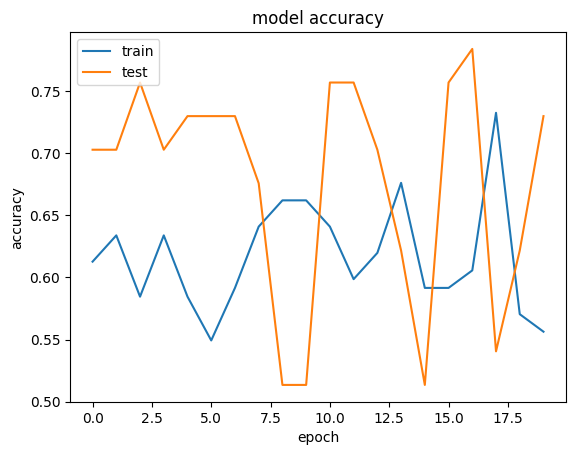

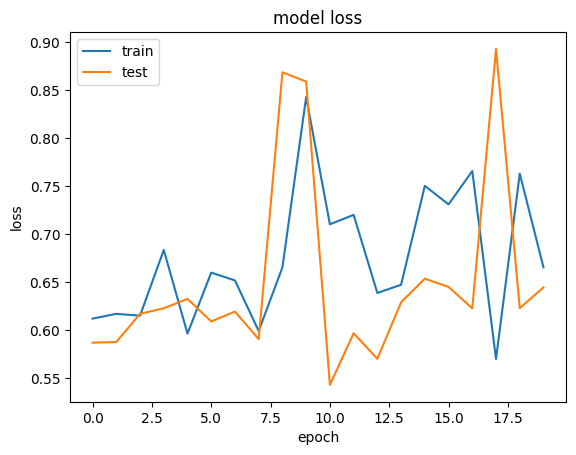

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


1/1 [==============================] - 0s 19ms/step

[[1.]]

Prediction:  no


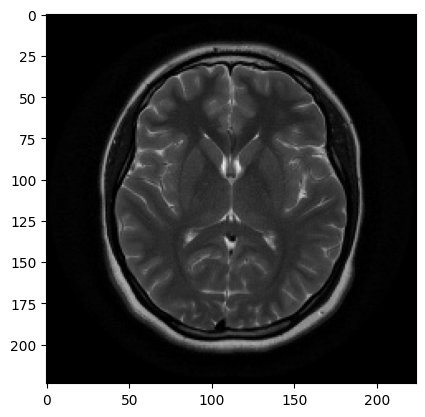

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/1 no.jpeg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="no"
else:
    prediction ="yes"
print('Prediction: ',prediction)

img=mpimg.imread('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/1 no.jpeg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 21ms/step

[[0.]]

Prediction:  yes


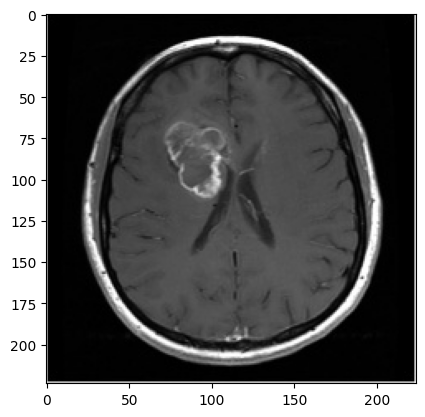

In [ ]:
img_pred = image.load_img("/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y100.JPG",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="no"
else:
    prediction ="yes"
print('Prediction: ',prediction)

img=mpimg.imread('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y100.JPG')
imgplot = plt.imshow(img)
plt.show()
